In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
import matplotlib.pyplot as plt
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.globals import CurrentConfig, NotebookType


In [2]:
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

# 读取数据

## 行政区数据

In [3]:
MarketData=pd.read_excel("./亚马逊用户画像.xlsx",sheet_name=0,index_col=0)

In [4]:
MarketData.head(5)

,美国州名,美国州名英文,州名简写,2018年人口（万）,2018年增长,人口,人口比例,订单销售,订单比例,市场占有指数,市场定位判断,Unnamed: 12,美国州名.1,美国州名英文.1,州名简写和简称,首府,首府英文名
排名,,,,,,,,,,,,,,,,,
1,加利福尼亚州,California,CA,3977,0.0061,3977,0.121324,218,0.123723,1.019774,1,NaN,阿拉斯加州,Alaska,AK,朱诺,Juneau
2,德克萨斯州,Texas,TX,2870,0.0141,2870,0.087553,139,0.078888,0.901023,0,NaN,阿拉巴马州,Alabama,AL,蒙哥马利,Montgomery
3,佛罗里达州,Florida,FL,2131,0.0156,2131,0.065009,139,0.078888,1.213485,1,NaN,阿肯色州,Arkansas,AR,小石城,Little rock
4,纽约州,New York,NY,1986,0.0007,1986,0.060586,120,0.068104,1.124100,1,NaN,亚利桑那州,Arizona,AZ,菲尼克斯,Phoenix
5,宾夕法尼亚州,Pennsylvania,PA,1282,0.0014,1282,0.039109,71,0.040295,1.030323,1,NaN,加利福尼亚州,California,CA,萨克拉门托,Sacramento


### 数据清洗

#### 有缺失值，进行特征工程

In [5]:
MarketData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   美国州名         51 non-null     object 
 1   美国州名英文       51 non-null     object 
 2   州名简写         51 non-null     object 
 3   2018年人口（万）   51 non-null     int64  
 4   2018年增长      51 non-null     float64
 5   人口           51 non-null     int64  
 6   人口比例         51 non-null     float64
 7   订单销售         51 non-null     int64  
 8   订单比例         51 non-null     float64
 9   市场占有指数       51 non-null     float64
 10  市场定位判断       51 non-null     int64  
 11  Unnamed: 12  0 non-null      float64
 12  美国州名.1       51 non-null     object 
 13  美国州名英文.1     51 non-null     object 
 14  州名简写和简称      51 non-null     object 
 15  首府           50 non-null     object 
 16  首府英文名        50 non-null     object 
dtypes: float64(5), int64(4), object(8)
memory usage: 7.2+ KB


#### 查看obj类型数据种类及脏数据

In [6]:
for i in MarketData.columns:
    if MarketData[i].dtype=="object":
        print("当前特征为:{}".format(i))
        print(MarketData[i].value_counts())
        print("-"*10)

当前特征为:美国州名
南卡罗来纳州    1
罗德岛州      1
马里兰州      1
密苏里州      1
阿拉斯加州     1
康涅狄格州     1
内华达州      1
奥克拉荷马州    1
田纳西州      1
印第安纳州     1
伊利诺伊州     1
爱荷华州      1
夏威夷州      1
阿拉巴马州     1
南达科他州     1
明尼苏达州     1
堪萨斯州      1
科罗拉多州     1
西弗吉尼亚州    1
德克萨斯州     1
弗吉尼亚州     1
佛蒙特州      1
蒙大拿州      1
纽约州       1
俄勒冈州      1
加利福尼亚州    1
新墨西哥州     1
犹他州       1
威斯康辛州     1
阿肯色州      1
密歇根州      1
路易斯安那州    1
密西西比州     1
爱达荷州      1
内布拉斯加州    1
新泽西州      1
马萨诸塞州     1
宾夕法尼亚州    1
乔治亚州      1
佛罗里达州     1
俄亥俄州      1
北达科他州     1
亚利桑那州     1
缅因州       1
北卡罗来纳州    1
哥伦比亚特区    1
怀俄明州      1
特拉华州      1
新罕布什尔州    1
华盛顿州      1
肯塔基州      1
Name: 美国州名, dtype: int64
----------
当前特征为:美国州名英文
Arkansas                1
North Dakota            1
Michigan                1
Kentucky                1
Louisiana               1
Oregon                  1
Missouri                1
Kansas                  1
Florida                 1
Pennsylvania            1
Hawaii                  1
District of Columbia    1
Connecticut     

In [7]:
MarketData.columns=['美国州名', '州名英文', '州名简写', '18年人口（万）', '18年增长', '人口', '人口比例', '订单销售','订单比例', '市场占有指数', '市场定位判断', 'Unnamed: 12', '美国州名.1', '美国州名英文.1','州名简写和简称', '首府', '首府英文名']

#### 两列是相同的，可以删除

In [8]:
tmp=MarketData["18年人口（万）"]!=MarketData["人口"]
tmp.sum()

0

In [9]:
dropcol=["18年人口（万）"]

#### Unnamed: 12 全是nan，也是无用的

In [10]:
MarketData["Unnamed: 12"].sum()

0.0

In [11]:
dropcol.append("Unnamed: 12")
dropcol.append('美国州名.1')
dropcol.append('美国州名英文.1')
dropcol.append('州名简写和简称')

In [12]:
MarketData.drop(labels=dropcol,axis=1,inplace=True)

## 订单数据

In [13]:
Data=pd.read_excel("./亚马逊用户画像.xlsx",sheet_name=1,header=0,index_col=0)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2088 entries, 0 to 2087
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   订单ID     2088 non-null   object 
 1   订单号      2088 non-null   int64  
 2   下单时间     1762 non-null   object 
 3   支付时间     1762 non-null   object 
 4   买家邮箱     1762 non-null   object 
 5   买家姓名     1762 non-null   object 
 6   买家电话     841 non-null    object 
 7   SKU      1762 non-null   object 
 8   产品名称     1762 non-null   object 
 9   产品数量     1762 non-null   float64
 10  货币       1762 non-null   object 
 11  产品价格     1762 non-null   float64
 12  产品含税     1762 non-null   float64
 13  邮费       1762 non-null   float64
 14  邮费含税     1762 non-null   float64
 15  配送类型     1762 non-null   object 
 16  配送名称     1762 non-null   object 
 17  收件人姓名    1762 non-null   object 
 18  配送地址1    1762 non-null   object 
 19  配送地址2    66 non-null     object 
 20  配送地址3    0 non-null      float64
 21  配送城市     1762 

### 数据清洗

In [14]:
Data.drop(["配送地址2","配送地址3","配送开始时间","配送结束时间","配送时间区间","配送说明","销售渠道","订单号.1","价格标示","配送情况"],axis=1,inplace=True)

In [15]:
Data.isna().sum()

订单ID          0
订单号           0
下单时间        326
支付时间        326
买家邮箱        326
买家姓名        326
买家电话       1247
SKU         326
产品名称        326
产品数量        326
货币          326
产品价格        326
产品含税        326
邮费          326
邮费含税        326
配送类型        326
配送名称        326
收件人姓名       326
配送地址1       326
配送城市        326
配送州         326
邮编          326
配送国家        326
配送电话       1262
产品折扣          0
产品折扣编码     1762
配送折扣          0
配送折扣编码     1762
最早配送时间      326
最晚配送时间      326
最早送达时间      326
最晚送达时间      326
是否为B端订单     326
dtype: int64

In [16]:
Data[Data["下单时间"].isna()].head()

,订单ID,订单号,下单时间,支付时间,买家邮箱,买家姓名,买家电话,SKU,产品名称,产品数量,...,配送电话,产品折扣,产品折扣编码,配送折扣,配送折扣编码,最早配送时间,最晚配送时间,最早送达时间,最晚送达时间,是否为B端订单
2,111-6414556-4980267,29168717820522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0,VPC-1-68429431 Coupon,NaN,NaN,NaN,NaN,NaN
11,112-1621675-9449818,4497210301594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0,VPC-1-68429431 Coupon,NaN,NaN,NaN,NaN,NaN
18,114-0937814-6293060,57034703376610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0,MPC-S 购买折扣 2019/05/24 11-8-25-52,NaN,NaN,NaN,NaN,NaN
20,113-0818586-2705061,56096454247450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0,MPC-S 购买折扣 2019/05/24 11-8-25-52,NaN,NaN,NaN,NaN,NaN
22,114-2820497-4125856,9563030743858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0,MPC-S 购买折扣 2019/05/24 11-8-25-52,NaN,NaN,NaN,NaN,NaN


### 可以看到有订单出现两次，推测是一个订单记录了两行，可以取众数来填补缺失的数据信息

In [17]:
Data[Data["订单号"]==57034703376610]

,订单ID,订单号,下单时间,支付时间,买家邮箱,买家姓名,买家电话,SKU,产品名称,产品数量,...,配送电话,产品折扣,产品折扣编码,配送折扣,配送折扣编码,最早配送时间,最晚配送时间,最早送达时间,最晚送达时间,是否为B端订单
17,114-0937814-6293060,57034703376610,2019-05-24T10:15:51-07:00,2019-05-24T10:15:51-07:00,x9rqfwtncylmdq9@marketplace.amazon.com,Jose Rodriguez,NaN,AY5194LV0M,Women's Casual Letters Printed T-Shirt Short S...,1.0,...,NaN,-14.0,MPC-S 购买折扣 2019/05/24 11-8-25-52,0,NaN,2019-05-28T00:00:00-07:00,2019-05-29T23:59:59-07:00,2019-06-17T00:00:00-07:00,2019-07-09T23:59:59-07:00,0.0
18,114-0937814-6293060,57034703376610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0,MPC-S 购买折扣 2019/05/24 11-8-25-52,NaN,NaN,NaN,NaN,NaN


In [18]:
idx=Data[Data["下单时间"].isna()]["订单号"]
drop_idx=Data[Data["订单号"].isin(idx)].index
new_Date=Data[Data["订单号"].isin(idx)].groupby("订单号").apply(pd.DataFrame.mode)
new_Date=new_Date.swaplevel().loc[0]
Data.drop(index=drop_idx,inplace=True)
Data_n=pd.concat([Data,new_Date],axis=0)
Data_n.index=range(Data_n.shape[0])

In [19]:
Data_n.drop(["买家电话","配送电话"],axis=1,inplace=True)
Data_n.drop(["配送折扣编码","产品折扣编码"],axis=1,inplace=True)
Data_n.drop(["配送国家"],axis=1,inplace=True)
Data_n.drop(["货币"],axis=1,inplace=True)

#### 配送州的数据清洗

In [20]:
mapp={}
for i in MarketData.index:
    key=MarketData.loc[i]["州名英文"].replace("\xa0"," ")
    value=MarketData.loc[i]["州名简写"]

    key1=MarketData.loc[i]["州名英文"].replace("\xa0"," ").upper()
    mapp[key]=value
    mapp[key1]=value
    mapp[value]=value

In [21]:
Data_n["配送州"]=Data_n["配送州"].apply(lambda x:x.upper().replace(".","")).map(mapp)

In [22]:
for i in Data_n.columns:
    if Data[i].dtype=="object":
        print("当前属性值: {}".format(i))
        print(Data_n[i].value_counts())
        print("-"*10)

当前属性值: 订单ID
114-9228731-7613038    4
113-7839466-0380259    4
112-0000925-8865079    4
114-7294117-0119411    4
113-2637250-7129817    3
                      ..
112-3289003-4314607    1
113-2750732-5820269    1
113-4612009-0141003    1
112-0622279-1515412    1
113-7514450-2289040    1
Name: 订单ID, Length: 1634, dtype: int64
----------
当前属性值: 下单时间
2019-06-21T07:54:30-07:00    4
2019-08-11T16:46:00-07:00    4
2019-07-16T08:15:59-07:00    4
2019-07-20T06:56:32-07:00    4
2019-06-10T06:36:50-07:00    3
                            ..
2019-06-02T11:01:43-07:00    1
2019-05-24T22:07:35-07:00    1
2019-05-25T15:33:17-07:00    1
2019-06-04T20:07:48-07:00    1
2019-07-09T20:34:24-07:00    1
Name: 下单时间, Length: 1634, dtype: int64
----------
当前属性值: 支付时间
2019-06-21T07:54:30-07:00    4
2019-08-11T16:46:00-07:00    4
2019-07-16T08:15:59-07:00    4
2019-07-20T06:56:32-07:00    4
2019-06-10T06:36:50-07:00    3
                            ..
2019-06-02T11:01:43-07:00    1
2019-05-24T22:07:35-07:00    1


### 创建性别列

In [23]:
def split_gender(x):
    if re.match("^Women|^Men",x):
        return x.split(" ",1)[0],x.split(" ",1)[1]
    elif re.match("^Girl",x):
        return "Women",x.split(" ",1)[1]
    else:
        return "ALL",x

In [24]:
Data_n["购买性别"],Data_n["产品"]=zip(*Data_n["产品名称"].apply(split_gender))

In [25]:
Data_n["购买性别"]=Data_n["购买性别"].apply(lambda x: x.replace("Womens","Women"))
Data_n["购买性别"]=Data_n["购买性别"].apply(lambda x: x.replace("Women's","Women"))
Data_n["购买性别"]=Data_n["购买性别"].apply(lambda x: x.replace("Womens's","Women"))
Data_n["购买性别"]=Data_n["购买性别"].apply(lambda x: x.replace("Men's","Men"))
Data_n["购买性别"]=Data_n["购买性别"].apply(lambda x: x.replace("Mens","Men"))


Data_n["购买性别"].value_counts()

Women    1616
Men       128
ALL        18
Name: 购买性别, dtype: int64

### 产品参数的创建，包括商品颜色和商品尺码

In [26]:
Data_n["产品参数"]=Data_n["产品"].str.extract(r"(\(.*\)$)")
Data_n["产品参数"]=Data_n["产品参数"].str.replace("(","").str.replace(")","")
Data_n["尺码"]=Data_n["产品参数"].str.split(",",expand=True)[0]
Data_n["颜色"]=Data_n["产品参数"].str.split(",",expand=True)[1]
Data_n["产品"]=Data_n["产品"].str.split("(",expand=True)[0]

<ipython-input-26-c7d0edbcfc1b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  Data_n["产品参数"]=Data_n["产品参数"].str.replace("(","").str.replace(")","")


In [27]:
color_li=["Black","Blue","Grey","White","Olive","Colour","Green","Yellow","Pink","Beige","Orange","Purple","Brown","Red","Khaki"]

In [28]:
def color(x,color_li):
    for c in color_li:
        if re.findall(c,x) !=[]:
            return c,x.replace(c,"")
    return "",x

In [29]:
idx=Data_n[Data_n["颜色"].isna()].index
Data_n.loc[idx,"颜色"],Data_n.loc[idx,"产品"]=zip(*Data_n.loc[idx]["产品"].apply(color,color_li=color_li))

In [30]:
def size(x,a):
    x[a]=x[a].strip()
    x[a]=x[a].replace("-1","")
    x[a]=x[a].replace("1-","")
    x[a]=x[a].replace("2-","")
    x[a]=x[a].replace("3-","")
    x[a]=x[a].replace("-3","")
    x[a]=x[a].replace("-2","")
    x[a]=x[a].replace("-Thankful","")
    x[a]=x[a].replace("F-","")
    x[a]=x[a].replace("A-","")
    x[a]=x[a].replace("B-","")
    x[a]=x[a].replace("C-","")
    x[a]=x[a].replace("-Stripe","")
    x[a]=x[a].replace("Blackk","Black")
    x[a]=x[a].replace("-Blessed","")
    x[a]=x[a].replace("Light ","")
    x[a]=x[a].replace("Piece-","")
    x[a]=x[a].replace("Greenn","Green")
    x[a]=x[a].replace("Army ","")
    x[a]=x[a].replace("Whitee","white")
    x[a]=x[a].replace("white","White")
    x[a]=x[a].replace("Wine Red","Red")
    x[a]=x[a].replace("Red Wine","Red")
    x[a]=x[a].replace("Red wine","Red")
    x[a]=x[a].replace("Royal Blue","Blue")
    x[a]=x[a].replace("Sky Blue","Blue")
    x[a]=x[a].replace("Dark Grey","Grey")
    x[a]=x[a].replace("Faith-Grey","Grey")
    x[a]=x[a].replace("Brownn","Brown")
    x[a]=x[a].replace("Gray","Grey")
    x[a]=x[a].replace("Greyy","Grey")
    x[a]=x[a].replace("khakii","Khaki")
    x[a]=x[a].replace("khaki","Khaki")
    x[a]=x[a].replace("Colour","Color")
    x[a]=x[a].replace("Beigee","Beige")
    x[a]=x[a].replace("Free Expedited","")
    x[a]=x[a].replace("Begie","Beige")
    return x[a]

In [31]:
Data_n["颜色"]=Data_n.apply(size,a="颜色",axis=1)
Data_n["颜色"].value_counts()

Black             443
Blue              230
Grey              139
Green             138
White             122
                  119
Red               116
Purple             93
Khaki              61
Beige              57
Navy               49
Pink               30
Brown              28
Yellow             24
US 7.5             22
US 9               13
Burgundy           11
Nude               11
Orange             10
US 10               9
US 6.5              7
Olive               5
Color               4
Muticolor           4
Whitee              4
Coffee              3
US 5.5              2
US 12               1
Wine                1
Camouflage          1
Medium              1
US 4.5              1
Gold                1
Queen 09-Woman      1
Rust                1
Name: 颜色, dtype: int64

In [32]:
size_li=["Large","XX-Large","X-Large","Medium","Small","XL","X-Large"]
def size(x,size_li):
    for c in size_li:
        if re.findall(c,x) !=[]:
            return c,x.replace(c,"")
    return "",x

In [33]:
idx=Data_n[Data_n["尺码"].isna()].index
Data_n.loc[idx,"尺码"],Data_n.loc[idx,"产品"]=zip(*Data_n.loc[idx]["产品"].apply(size,size_li=size_li))
Data_n.drop("产品参数",axis=1,inplace=True)

#### 经发现尺码与颜色的顺序有误，进行调整

In [34]:
def size(x,a):
    x[a]=x[a].strip()
    x[a]=x[a].replace("-1","")
    x[a]=x[a].replace("1-","")
    x[a]=x[a].replace("2-","")
    x[a]=x[a].replace("3-","")
    x[a]=x[a].replace("-3","")
    x[a]=x[a].replace("-2","")
    x[a]=x[a].replace("-Thankful","")
    x[a]=x[a].replace("F-","")
    x[a]=x[a].replace("A-","")
    x[a]=x[a].replace("B-","")
    x[a]=x[a].replace("C-","")
    x[a]=x[a].replace("-Stripe","")
    x[a]=x[a].replace("Blackk","Black")
    x[a]=x[a].replace("-Blessed","")
    x[a]=x[a].replace("Light ","")
    x[a]=x[a].replace("Piece-","")
    x[a]=x[a].replace("Greenn","Green")
    x[a]=x[a].replace("Army ","")
    x[a]=x[a].replace("Whitee","white")
    x[a]=x[a].replace("white","White")
    x[a]=x[a].replace("Wine Red","Red")
    x[a]=x[a].replace("Red Wine","Red")
    x[a]=x[a].replace("Red wine","Red")
    x[a]=x[a].replace("Royal Blue","Blue")
    x[a]=x[a].replace("Sky Blue","Blue")
    x[a]=x[a].replace("Dark Grey","Grey")
    x[a]=x[a].replace("Faith-Grey","Grey")
    x[a]=x[a].replace("Brownn","Brown")
    x[a]=x[a].replace("Gray","Grey")
    x[a]=x[a].replace("Greyy","Grey")
    x[a]=x[a].replace("khakii","Khaki")
    x[a]=x[a].replace("khaki","Khaki")
    x[a]=x[a].replace("Colour","Color")
    x[a]=x[a].replace("Beigee","Beige")
    x[a]=x[a].replace("Free Expedited","")
    x[a]=x[a].replace("Begie","Beige")
    return x[a]

In [35]:
Data_n["尺码"]=Data_n.apply(size,a="尺码",axis=1)

In [36]:
size_li=["Large","XX-Large","X-Large","Medium","Small","XL","X-Large","S","L","US"]
color_li=["Black","Blue","Grey","White","Olive","Colour","Green","Yellow","Pink","Beige","Orange","Purple","Brown","Red","Khaki"]

In [37]:
def swape(x,size_li,color_li):
    for c in color_li:
        for s in size_li:
            if re.findall(c,x["尺码"])!=[] or re.findall(s,x["颜色"]) !=[]:
                x["颜色"],x["尺码"]=x["尺码"],x["颜色"]
    return x["尺码"],x["颜色"]

In [38]:
Data_n["尺码"],Data_n["颜色"]=zip(*Data_n.apply(swape,size_li=size_li,color_li=color_li,axis=1))

In [39]:
Data_n["颜色"]=Data_n.apply(size,a="颜色",axis=1)
Data_n["颜色"].value_counts()

Black              447
Blue               230
Grey               139
Green              138
White              126
                   119
Red                116
Purple              93
Brown               75
Khaki               61
Beige               61
Navy                49
Pink                30
Yellow              24
Nude                11
Burgundy            11
Orange              10
Olive                5
Muticolor            4
Color                4
Coffee               3
Queen 09-Woman       1
fuck Off-purple      1
Camouflage           1
Rust                 1
Gold                 1
Wine                 1
Name: 颜色, dtype: int64

In [40]:
def resize(x):
    if re.findall("BM",x) !=[]:
        tmp=x.split(" ")
        return " ".join([tmp[2],tmp[0]])
    elif x.isdigit():
        return "US "+x
    elif re.match("Improved",x):
        return x.split(" ")[1]
    elif re.match("one",x,re.IGNORECASE):
        return "One Size"
    elif re.match("size",x,re.IGNORECASE):
        return "US "+x.split(" ")[1][1]
    else:
        return x

In [41]:
Data_n["尺码"]=Data_n["尺码"].apply(resize)
Data_n["尺码"].value_counts()

                       692
M                      216
L                      147
XL                     106
S                      103
2XL                     67
US 9                    48
US 7.5                  45
One Size                44
Large                   42
US 10                   31
Medium                  28
3XL                     22
US 8                    20
US 11                   20
US 6.5                  19
4XL                     19
US 7                    18
US 8.5                  10
US 12                   10
US 6                    10
Small                    9
Run Small XS             7
XXL                      4
US 4.5                   4
US 5.5                   4
XS                       3
X-Large                  3
2XL Peacock              2
Run Small                2
Buy One Size Up 3XL      1
XX-Large                 1
US 5                     1
L-Men Size               1
White S                  1
L-XXXXL                  1
EU Size 38               1
N

In [42]:
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("Large","L"))
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("Small","S"))
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("XXL","2XL"))
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("Medium","M"))
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("X-L","XL"))
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("XX-L","2XL"))
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("Run S XS","XS"))
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("Run S","S"))
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("2XL Peacock","2XL"))
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("L-XX2XL","2XL"))
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("White S","S"))
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("Buy One Size Up 3XL","3XL"))
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("EU Size 38","US 8"))
Data_n["尺码"]=Data_n["尺码"].apply(lambda x:x.replace("L-Men Size","L"))

Data_n["尺码"].value_counts()

            692
M           244
L           190
S           115
XL          109
2XL          74
US 9         48
US 7.5       45
One Size     44
US 10        31
3XL          23
US 8         21
US 11        20
US 6.5       19
4XL          19
US 7         18
XS           10
US 6         10
US 12        10
US 8.5       10
US 5.5        4
US 4.5        4
XXL           1
US 5          1
Name: 尺码, dtype: int64

#### 时间数据的清洗

In [43]:
Data_n.drop(["支付时间"],axis=1,inplace=True)

In [44]:
Data_n["下单时间"]=pd.to_datetime(Data_n["下单时间"])
Data_n["最早配送时间"]=pd.to_datetime(Data_n["最早配送时间"])
Data_n["最晚配送时间"]=pd.to_datetime(Data_n["最晚配送时间"])
Data_n["最早送达时间"]=pd.to_datetime(Data_n["最早送达时间"])
Data_n["最晚送达时间"]=pd.to_datetime(Data_n["最晚送达时间"])



In [45]:
Data_n.drop(["产品名称"],axis=1,inplace=True)

In [47]:
Data_n.to_csv("./Clean.csv")

# 数据分析

## 用户分析

### 购买性别呈现明显的女性占优趋势

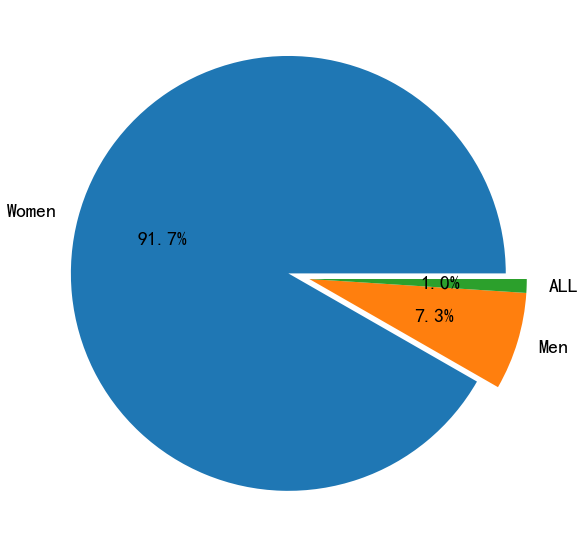

In [48]:
plt.figure(figsize=(10,10))
plt.pie(Data_n["购买性别"].value_counts(),labels=Data_n["购买性别"].value_counts().index,explode=[0.1,0,0],autopct="%0.1f%%",textprops={"fontsize":20})
plt.show()

In [49]:
Data_n["总价"]=Data_n["产品数量"]*Data_n["产品价格"]

#### 在平均购买力上，也是女士的购买金额要大于男士

In [50]:
tmp=Data_n.groupby("购买性别")["总价"].mean()
bar = Bar()
bar.add_xaxis(tmp.index.tolist())
bar.add_yaxis(series_name="平均购买金额",y_axis=np.round(tmp.values,2).tolist()
            ,label_opts=opts.LabelOpts(is_show=True, position='top', formatter="{c}")  )
bar.load_javascript()

In [51]:
bar.render_notebook()

In [52]:
tmp=Data_n.groupby(["配送州","购买性别"]).agg({"总价":[np.mean,np.size]})
tmp=tmp.swaplevel()

In [53]:
def sort_val(data=tmp,gender="Women",MarketData=MarketData,offset=5):
    tmp_data=pd.merge(left=data.loc[gender],right=MarketData,left_index=True,right_on="州名简写")
    tmp_data.rename(columns={tmp_data.columns[0]:"消费均值",tmp_data.columns[1]:"消费人数"},inplace=True)
    tmp_data.sort_values(by=('消费均值'),ascending=False,inplace=True)
    plt.figure(figsize=(25,10))
    sns.barplot(x=tmp_data["美国州名"],y=tmp_data["消费均值"])
    plt.xticks(rotation=30)

    plt.twinx()
    plt.plot(tmp_data["美国州名"],tmp_data["消费人数"],"-o")
    plt.title("各州"+gender+"订单双轴图")

    for i in tmp_data.index:
        plt.annotate(tmp_data.loc[i,"消费人数"],(tmp_data.loc[i,"美国州名"],tmp_data.loc[i,"消费人数"]+offset))

    plt.show()

#### 女性消费中，新罕布什尔州的平均单笔订单购买金额最大，达到36.19，但是只有7笔消费，而女性消费次数最大的州发生在加州，达到201次，平均每笔消费的金额20.93

E:\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


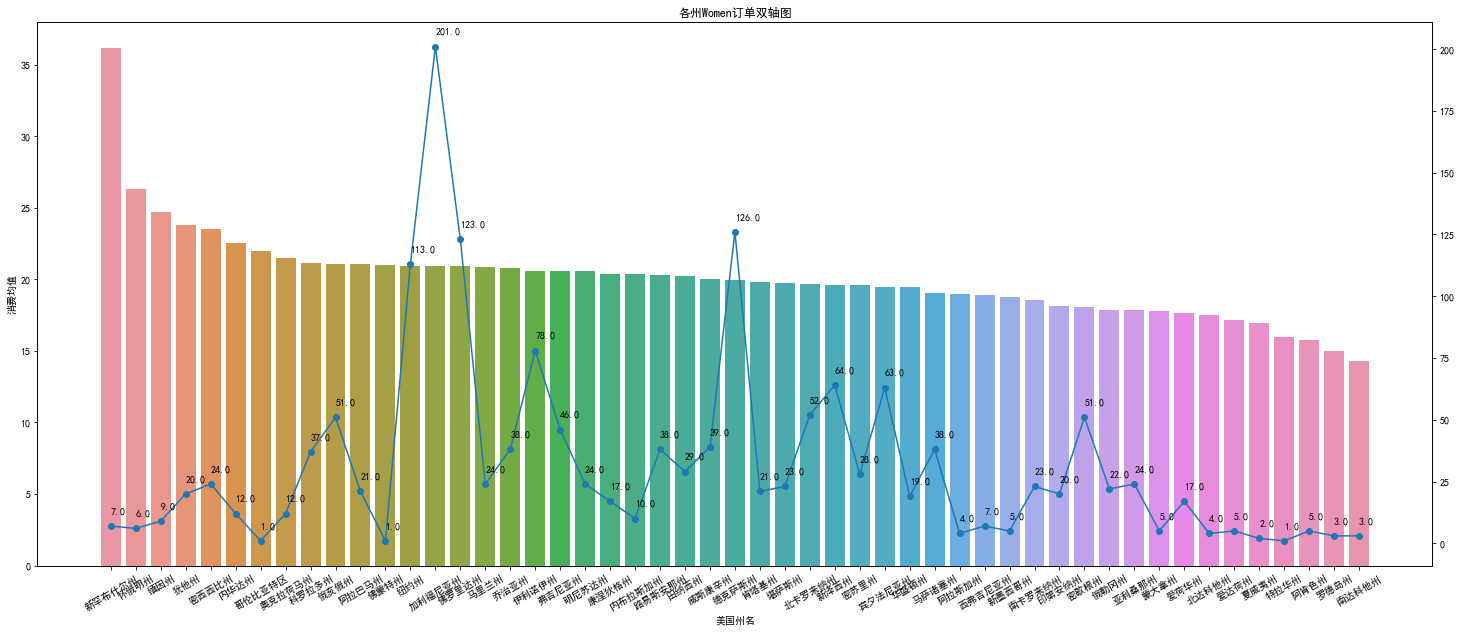

In [54]:
sort_val()

#### 男性消费中，消费次数最大的州在加州，达到15次，德州次之为13次

E:\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


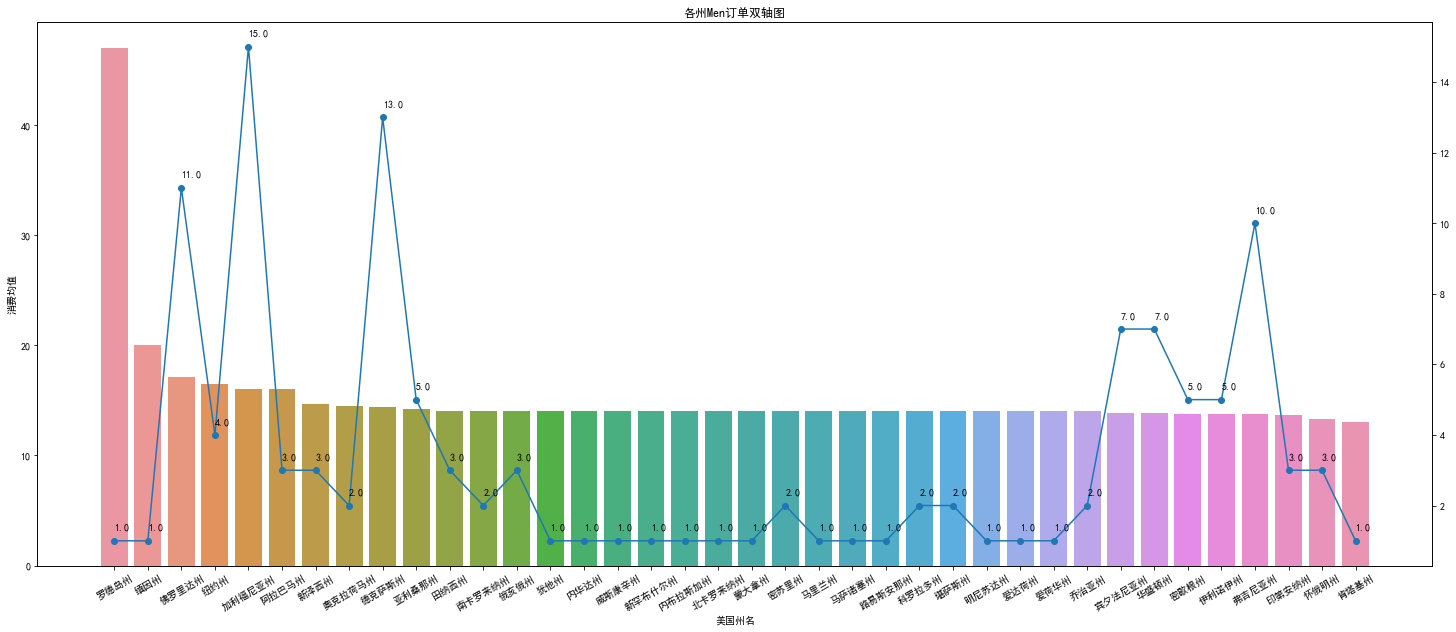

In [55]:
sort_val(data=tmp,gender="Men",offset=0.3)

In [56]:
tmp=Data_n.groupby("买家邮箱")["订单号"].count().sort_values(ascending=False)
tmp=tmp.value_counts()

In [57]:
Data_n["产品折扣"]=Data_n["产品折扣"].apply(lambda x:np.abs(x))
Data_n["折扣力度"]=pd.cut(Data_n["产品折扣"],bins=[-1,0,5,10,15,37],labels=["全价","95%折","90%折","85%折","更多"])
tmp1=Data_n.groupby("折扣力度")["买家邮箱"].nunique()
tmp1

折扣力度
全价      1300
95%折      30
90%折      58
85%折     168
更多        41
Name: 买家邮箱, dtype: int64

#### 超过90%的用户是一次消费用户，多次消费用户仅占不到10%，说明这一时间段用户的留存率并不高，应采取如发放优惠券，短信提示促销，评价有返现等方式挽回用户
#### 超过80%的用户购买了为打折的商品,说明用户相较于优惠更看重商品的质量或者的自身的需求

In [58]:

pie=(
    Pie(init_opts=opts.InitOpts(width="1200px", height="600px", theme='light'))
    .add('', [list(z) for z in zip(tmp.index.tolist(),
                                        tmp.values.tolist())],
                                        radius=['50', '150'],
                                        center=['25%', '65%']
                                        )
    .add('', [list(z) for z in zip(tmp1.index.tolist(),
                                        tmp1.values.tolist())],
                                        radius=['50', '150'],
                                        center=['70%', '65%']
                                        )
    .set_series_opts(label_opts=opts.LabelOpts(formatter='{b}：{c}  {d}%'))
    .set_global_opts(
        legend_opts=opts.LegendOpts(is_show=False),
        title_opts=[
            dict(
                text=f'消费次数占比',
                left="10%",
                top='15%',
                textStyle=dict(
                    color='#000',
                    fontSize=20)),
            dict(
                text=f'购买折扣商品人数',
                left="50%",
                top='15%',
                textStyle=dict(
                    color='#000',
                    fontSize=20)),
            ])
)
pie.render_notebook()

In [59]:
idx=Data_n[Data_n["尺码"]==""].index

In [60]:
def Bikini(x):
    if re.findall("Bikini",x) !=[]:
        return "Bikini"
    else:
        return ""

In [61]:
Data_n.loc[idx,"尺码"]=Data_n.loc[idx]["产品"].apply(Bikini)

In [62]:
tmp=Data_n.groupby("尺码")["买家邮箱"].nunique()

bar=(
    Bar(init_opts=opts.InitOpts(width="1500px", height="600px", theme='light'))
    .add_xaxis(tmp.index.tolist())
    .add_yaxis(series_name="数量",y_axis=tmp.values.tolist())
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{c}"))
    .set_global_opts(xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=8)))
)

bar.render_notebook()

#### 女性买家购买商品数量前20的日期,其中2019年6月4日女性的销量最高，达到了94人次

In [63]:
Data_n["下单日期"]=Data_n["下单时间"].dt.date

In [64]:
tmp=Data_n.groupby(["下单日期","购买性别"])["买家邮箱"].nunique()

tmp1=tmp.loc[:,['Women']].sort_values(ascending=False)

tmp1=tmp1.reset_index(level=1)

tmp1=tmp1["买家邮箱"].iloc[:20]

In [65]:
bar=(
    
    Bar(init_opts=opts.InitOpts(width="1500px", height="600px", theme='light'))
    .add_xaxis(tmp1.index.to_list())
    .add_yaxis("购买数量",tmp1.values.tolist())
    .set_series_opts(label_opts=opts.LabelOpts(font_size=12))
    .set_global_opts(xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=8,rotate=25,vertical_align=1.5)))
)

bar.render_notebook()

#### 男性购买人次在2019-7-16日达到最大，但也知识7人次，相较于女性而言数量差距较大

In [66]:
tmp=Data_n.groupby(["下单日期","购买性别"])["买家邮箱"].nunique()

tmp1=tmp.loc[:,['Men']].sort_values(ascending=False)

tmp1=tmp1.reset_index(level=1)

tmp1=tmp1["买家邮箱"].iloc[:20]

In [67]:
bar=(
    
    Bar(init_opts=opts.InitOpts(width="1500px", height="600px", theme='light'))
    .add_xaxis(tmp1.index.to_list())
    .add_yaxis("购买数量",tmp1.values.tolist())
    .set_series_opts(label_opts=opts.LabelOpts(font_size=12))
    .set_global_opts(xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=8,rotate=25,vertical_align=1.5)))
)

bar.render_notebook()

In [68]:
Data_n["下单星期号"]=Data_n["下单时间"].dt.dayofweek

In [69]:
tmp=Data_n.groupby(["下单星期号","购买性别"])["买家邮箱"].nunique()

In [70]:
tmp=tmp.unstack(level=1)

In [71]:
tmp.rename(index={0:"星期一",1:"星期二",2:"星期三",3:"星期四",4:"星期五",5:"星期六",6:"星期日"},inplace=True)

In [72]:
tmp

购买性别,ALL,Men,Women
下单星期号,,,
星期一,3,21,214
星期二,3,21,245
星期三,2,13,165
星期四,1,14,187
星期五,3,14,288
星期六,3,19,182
星期日,2,20,201


#### 以星期划分，男性购买次数相差不大，而女性则在周五购买人次最高，有理由推断周五接近双休日购买欲望增强

In [73]:
bar=(
    Bar(init_opts=opts.InitOpts(width="1200px",height="600px",theme="dark"))
    .add_xaxis(tmp.index.tolist())
    .add_yaxis("女性",tmp["Women"].values.tolist())
    .add_yaxis("男性",tmp["Men"].values.tolist())
)

bar.render_notebook()